In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

c:\Users\jahon\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Reduzindo o dataset e dividindo X e Y para o modelo

In [2]:
data_full = pd.read_csv('dados.csv', sep=',')
data_full.head()

,MADE,SHOT TYPE,PERIOD,TIME REMAINING,SHOT DISTANCE (FT),is_home,off_win_rate,def_blocks,def_win_rate,Age,Height,Weight,DRAFT NUMBER
0,1,2,1,675,13,1,0.621951,435,0.621951,29,195.072,100.0,6
1,0,3,1,402,22,1,0.621951,435,0.621951,29,195.072,100.0,6
2,0,2,1,205,6,1,0.621951,435,0.621951,29,195.072,100.0,6
3,1,2,2,453,9,1,0.621951,435,0.621951,29,195.072,100.0,6
4,0,2,2,393,6,1,0.621951,435,0.621951,29,195.072,100.0,6


In [3]:
## versão com 10 mil linhas

data = data_full.sample(n=10000, random_state=23)

In [4]:
X = np.array(data.drop(['MADE'], axis=1))
y = np.array(data['MADE'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.2)

## Árvore de decisão

### Criando a árvore

In [5]:
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, tree.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, tree.predict(X_test))))
print(classification_report(y_test, tree.predict(X_test)))

Ein: 0.0000
Eout: 0.4640
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1027
           1       0.52      0.50      0.51       973

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.53      2000
weighted avg       0.54      0.54      0.54      2000



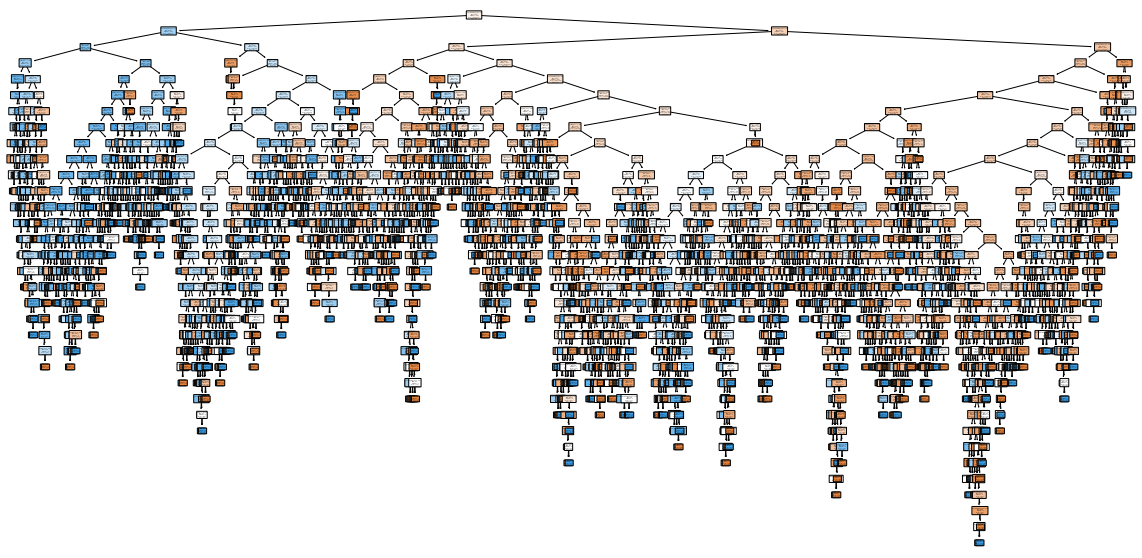

In [6]:
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True,
          rounded=True,
          feature_names=data.columns[1:],
          class_names=["No", "Yes"])
plt.show()

In [12]:
## altura da árvore tree
print('Altura da árvore: %d' % tree.get_depth())
## tamanho  
print('Número de nós: %d' % tree.get_n_leaves())


Altura da árvore: 33
Número de nós: 2185


### Poda por minimal cost-complexity

In [7]:
ccp_path = tree.cost_complexity_pruning_path(X_train, y_train)
alphas = {'ccp_alpha': ccp_path.ccp_alphas}

new_tree = GridSearchCV(estimator=tree, param_grid=alphas, cv = 10)
new_tree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'ccp_alpha': array([0.00000000e+00, 6.66666667e-05, 7.63888889e-05, 7.73809524e-05,
       7.84313725e-05, 7.95454545e-05, 8.01282051e-05, 8.02469136e-05,
       8.06451613e-05, 8.33333333e-05, 8.33333333e-05, 8.33333333e-05,
       8.33333333e-05, 8.33333333e-05, 9.37500000e-05, 9.37500000e-05,
       9.37500000...
       3.95489927e-04, 3.96476697e-04, 4.00187773e-04, 4.04069097e-04,
       4.06542805e-04, 4.09090909e-04, 4.17461236e-04, 4.18949901e-04,
       4.20702707e-04, 4.23685872e-04, 4.25566421e-04, 4.32259241e-04,
       4.46366162e-04, 4.52007265e-04, 4.77360175e-04, 4.80724583e-04,
       4.84214084e-04, 4.99294771e-04, 5.46569581e-04, 5.53952199e-04,
       6.81639350e-04, 2.59881096e-03, 3.90123061e-03, 3.14304753e-02])})

In [8]:
new_tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.000681639350183838, random_state=23)

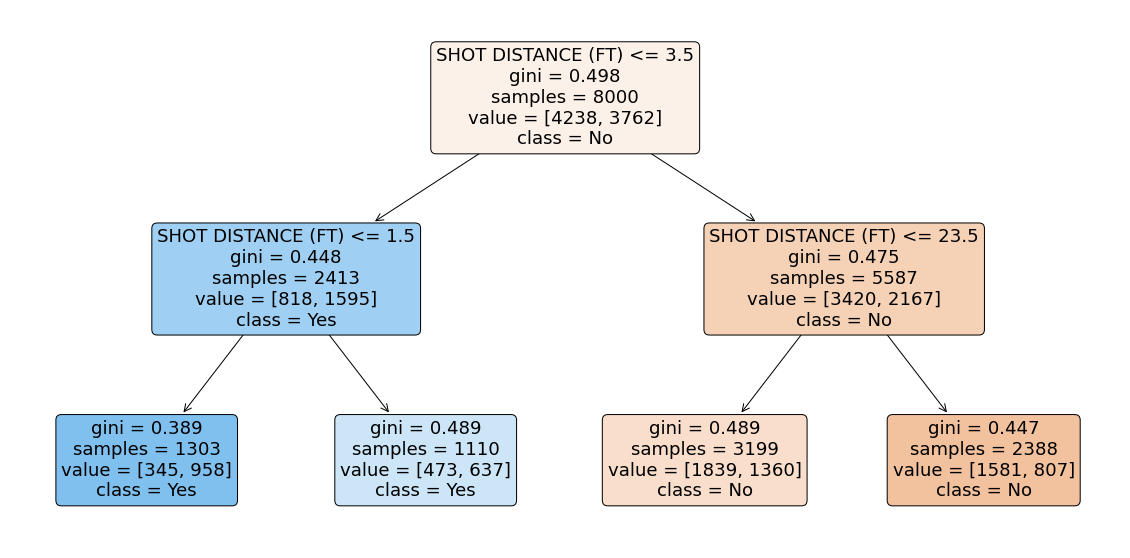

In [9]:
plt.figure(figsize=(20,10))
plot_tree(new_tree.best_estimator_,
          filled=True,
          rounded=True,
          feature_names=data.columns[1:],
          class_names=["No", "Yes"])
plt.show()

In [10]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, new_tree.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, new_tree.predict(X_test))))
print(classification_report(y_test, new_tree.predict(X_test)))

Ein: 0.3731
Eout: 0.3750
              precision    recall  f1-score   support

           0       0.60      0.82      0.69      1027
           1       0.69      0.41      0.52       973

    accuracy                           0.62      2000
   macro avg       0.64      0.62      0.61      2000
weighted avg       0.64      0.62      0.61      2000

